<a href="https://colab.research.google.com/github/srinath-96/Code_files/blob/main/ProgrammingforDS_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Machine Learning Project 1 : Classification using Logistic Regression Models
**Srinath Murali Krishnan | NetID:SMK220008**

# Data Importing and Preliminary Analysis

1) We first import the data and identify the target variable
2) We describe the data and observe column values

In [1]:
pip install scikit-learn==1.3.0 numpy==1.24.4 pandas==2.0.3 matplotlib==3.7.2 mlxtend==0.22.0 graphviz==0.20.1 mglearn==0.2.0 future==0.18.3 notebook==7.0.2 ipykernel==6.25.0 shap==0.42.1 category-encoders==2.6.1 seaborn==0.12.2 optuna==3.3.0 ipywidgets==8.1.0 xgboost==2.0.3 plotly==5.14.1 pyarrow==16.1.0 polars==0.20.29


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Reason for being yanked: <none given>
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 89.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.0/548.0 kB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/

In [1]:
import pandas as pd
import numpy as np

In [61]:
# Import Dataset
X_train = pd.read_csv('SBA_loans_project_1(1).csv')

In [62]:
X_train.drop('index',axis=1,inplace=True)

In [63]:
def describe_more(df,normalize_ind=False, weight_column=None, skip_columns=[], dropna=True):
    var = [] ; l = [] ; t = []; unq =[]; min_l = []; max_l = [];
    assert isinstance(skip_columns, list), "Argument skip_columns should be list"
    if weight_column is not None:
        if weight_column not in list(df.columns):
            raise AssertionError('weight_column is not a valid column name in the input X_trainFrame')

    for x in df:
        if x in skip_columns:
            pass
        else:
            var.append( x )
            uniq_counts = len(pd.value_counts(df[x],dropna=dropna))
            uniq_counts = len(pd.value_counts(df[x], dropna=dropna)[pd.value_counts(df[x],dropna=dropna)>0])
            l.append(uniq_counts)
            t.append( df[ x ].dtypes )
            min_l.append(df[x].apply(str).str.len().min())
            max_l.append(df[x].apply(str).str.len().max())
            if weight_column is not None and x not in skip_columns:
                df2 = df.groupby(x).agg({weight_column: 'sum'}).sort_values(weight_column, ascending=False)
                df2['authtrans_vts_cnt']=((df2[weight_column])/df2[weight_column].sum()).round(2)
                unq.append(df2.head(n=100).to_dict()[weight_column])
            else:
                df_cat_d = df[x].value_counts(normalize=normalize_ind,dropna=dropna).round(decimals=2)
                df_cat_d = df_cat_d[df_cat_d>0]
                #unq.append(df[x].value_counts().iloc[0:100].to_dict())
                unq.append(df_cat_d.iloc[0:200].to_dict())


    levels = pd.DataFrame( { 'A_Variable' : var , 'Levels' : l , 'X_traintype' : t ,
                             'Min Length' : min_l,
                             'Max Length': max_l,
                             'Level_Values' : unq} )
    #levels.sort_values( by = 'Levels' , inplace = True )
    return levels

In [64]:
x=describe_more(X_train)

In [65]:
x

,A_Variable,Levels,X_traintype,Min Length,Max Length,Level_Values
0,City,31255,object,1,30,"{'LOS ANGELES': 10455, 'HOUSTON': 9219, 'NEW Y..."
1,State,51,object,2,3,"{'CA': 117584, 'TX': 63509, 'NY': 51986, 'FL':..."
2,Zip,32701,int64,1,5,"{10001: 844, 90015: 837, 93401: 713, 90010: 67..."
3,Bank,5714,object,3,30,"{'BANK OF AMERICA NATL ASSOC': 78252, 'WELLS F..."
4,BankState,56,object,2,3,"{'CA': 106232, 'NC': 71632, 'IL': 59212, 'OH':..."
5,NAICS,1306,int64,1,6,"{0: 181851, 722110: 25180, 722211: 17563, 8111..."
6,NoEmp,575,int64,1,4,"{1: 138723, 2: 124353, 3: 81715, 4: 66183, 5: ..."
7,NewExist,3,float64,3,3,"{1.0: 580543, 2.0: 227637, 0.0: 943}"
8,CreateJob,234,int64,1,4,"{0: 566264, 1: 56862, 2: 52008, 3: 25933, 4: 1..."
9,RetainedJob,346,int64,1,4,"{0: 396441, 1: 79907, 2: 69176, 3: 44928, 4: 3..."


# Data Cleaning Step:

1) The strategy of data cleaning is to identify extra characters in columns that may or may not have just 2 viables characters such as RevLineCr and LowDoc with 'Y' and 'N'
2) we identify the context of the extra characters and replace them with Y and N respectively
3) if the character has no contextual backing, we convert them to null values
4) Final step involves identifying columns with null values and replacing them with imputed values in the corresponding column

In [66]:
#replacing values in RevLineCr with Y and N
X_train['RevLineCr']=X_train['RevLineCr'].replace('0','N')
X_train['RevLineCr']=X_train['RevLineCr'].replace('1','Y')
X_train['RevLineCr']=X_train['RevLineCr'].replace('T','Y')

In [67]:
#replacing values in RevLineCr with null that have no context
X_train['RevLineCr'] = X_train['RevLineCr'].apply(lambda x: x if x in ['Y', 'N'] else np.nan)


X_train['RevLineCr'].fillna(X_train['RevLineCr'].mode()[0], inplace=True)

In [68]:
#replacing values in LowDoc with Y and N
X_train['LowDoc']=X_train['LowDoc'].replace('0','N')
X_train['LowDoc']=X_train['LowDoc'].replace('S','Y')
X_train['LowDoc']=X_train['LowDoc'].replace('A','N')

In [69]:
#replacing values in LowDoc with null that have no context
X_train['LowDoc'] = X_train['LowDoc'].apply(lambda x: x if x in ['Y', 'N'] else np.nan)


X_train['LowDoc'].fillna(X_train['LowDoc'].mode()[0], inplace=True)


In [70]:
# defining target variable
y_train = X_train['MIS_Status']

In [71]:
y_train=y_train.to_frame()

In [72]:
X_train.drop('MIS_Status',axis=1,inplace=True)

In [73]:
describe_more(X_train)

,A_Variable,Levels,X_traintype,Min Length,Max Length,Level_Values
0,City,31255,object,1,30,"{'LOS ANGELES': 10455, 'HOUSTON': 9219, 'NEW Y..."
1,State,51,object,2,3,"{'CA': 117584, 'TX': 63509, 'NY': 51986, 'FL':..."
2,Zip,32701,int64,1,5,"{10001: 844, 90015: 837, 93401: 713, 90010: 67..."
3,Bank,5714,object,3,30,"{'BANK OF AMERICA NATL ASSOC': 78252, 'WELLS F..."
4,BankState,56,object,2,3,"{'CA': 106232, 'NC': 71632, 'IL': 59212, 'OH':..."
5,NAICS,1306,int64,1,6,"{0: 181851, 722110: 25180, 722211: 17563, 8111..."
6,NoEmp,575,int64,1,4,"{1: 138723, 2: 124353, 3: 81715, 4: 66183, 5: ..."
7,NewExist,3,float64,3,3,"{1.0: 580543, 2.0: 227637, 0.0: 943}"
8,CreateJob,234,int64,1,4,"{0: 566264, 1: 56862, 2: 52008, 3: 25933, 4: 1..."
9,RetainedJob,346,int64,1,4,"{0: 396441, 1: 79907, 2: 69176, 3: 44928, 4: 3..."


In [74]:
#imputing null values
cat=['City','State','Bank','BankState']
num=['NewExist']
for i in cat:
    X_train[i].fillna(X_train[i].mode().iloc[0],inplace=True)
for i in num:
    X_train[i].fillna(X_train[i].median(),inplace=True)

In [75]:
# check if any columns still have null values
for col in X_train.columns:
    if X_train[col].isna().any() == True:
        print(col)
    else:
      print(col,':no null values')

City :no null values
State :no null values
Zip :no null values
Bank :no null values
BankState :no null values
NAICS :no null values
NoEmp :no null values
NewExist :no null values
CreateJob :no null values
RetainedJob :no null values
FranchiseCode :no null values
UrbanRural :no null values
RevLineCr :no null values
LowDoc :no null values
DisbursementGross :no null values
BalanceGross :no null values
GrAppv :no null values
SBA_Appv :no null values


# Feature Engineering step

1) We construct 10 new features from the existing features in the dataset
2) The task is to create better features packed with more contextual information
3) We further use VIF for feature selection and getting rid of any possible multicollinearity

In [76]:
"""X=X_train.copy()
geo_concentration = data['State'].value_counts(normalize=True)
data['geo_concentration'] = data['State'].map(geo_concentration)"""

"X=X_train.copy()\ngeo_concentration = data['State'].value_counts(normalize=True)\ndata['geo_concentration'] = data['State'].map(geo_concentration)"

In [77]:

X_train['NewBusiness'] = X_train['NewExist'].apply(lambda x: 1 if x == 2 else 0)

X_train['CreditUtilizationRatio'] = X_train['GrAppv'] / X_train['SBA_Appv']

X_train['LoanPerEmployee'] = X_train['GrAppv'] / (X_train['NoEmp'] + 1)

X_train['EconomicSector'] = X_train['NAICS'].apply(lambda x: int(str(x)[:2]) if x > 0 else 0)

X_train['ProfitabilityIndicator'] = (X_train['RetainedJob'] > X_train['CreateJob']).astype(int)




In [78]:
X_train['RevLineCr']

,RevLineCr
0,N
1,N
2,N
3,N
4,Y
...,...
809242,Y
809243,N
809244,Y
809245,N


In [79]:
# CELL TO INSERT AFTER [206]

# --- Additional Interaction Term Feature Engineering ---
print(f"Number of features before adding interactions: {X_train.shape[1]}")
import numpy as np # Ensure numpy is imported
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd # Ensure pandas is imported

# --- Keep track of newly created columns ---
new_numeric_interactions = []
new_binary_flags = []
poly_interaction_cols = []

# --- Manual Interactions (Based on original & engineered features) ---

# Interaction: Loan Amount related features
X_train['GrAppv_x_SBA_Appv'] = X_train['GrAppv'] * X_train['SBA_Appv']
new_numeric_interactions.append('GrAppv_x_SBA_Appv')

# Interaction: Business Age/Type related features (using engineered 'NewBusiness')
X_train['LoanPerEmp_x_NewBiz'] = X_train['LoanPerEmployee'] * X_train['NewBusiness']
new_numeric_interactions.append('LoanPerEmp_x_NewBiz')
X_train['NoEmp_x_NewBiz'] = X_train['NoEmp'] * X_train['NewBusiness']
new_numeric_interactions.append('NoEmp_x_NewBiz')

# Interaction: Location and Business Type
# Create numerical flags first as UrbanRural is categorical (0, 1, 2)
X_train['IsUrban'] = (X_train['UrbanRural'] == 1).astype(int)
new_binary_flags.append('IsUrban') # Binary flag
X_train['IsRural'] = (X_train['UrbanRural'] == 2).astype(int)
new_binary_flags.append('IsRural') # Binary flag
# Interact engineered LoanPerEmployee with location flags
X_train['LoanPerEmp_x_Urban'] = X_train['LoanPerEmployee'] * X_train['IsUrban']
new_numeric_interactions.append('LoanPerEmp_x_Urban')
X_train['LoanPerEmp_x_Rural'] = X_train['LoanPerEmployee'] * X_train['IsRural']
new_numeric_interactions.append('LoanPerEmp_x_Rural')

# Interaction: Documentation and Credit Line
# Create numerical flags first as RevLineCr and LowDoc are 'Y'/'N'
X_train['RevLineCr_Y_flag'] = (X_train['RevLineCr'] == 'Y').astype(int)
new_binary_flags.append('RevLineCr_Y_flag') # Binary flag
X_train['LowDoc_Y_flag'] = (X_train['LowDoc'] == 'Y').astype(int)
new_binary_flags.append('LowDoc_Y_flag') # Binary flag
X_train['RevLine_x_LowDoc'] = X_train['RevLineCr_Y_flag'] * X_train['LowDoc_Y_flag']
new_numeric_interactions.append('RevLine_x_LowDoc') # Technically binary, but treat as numeric for scaling consistency

# Interaction: Jobs Created/Retained and Loan Amount
X_train['GrAppv_x_CreateJob'] = X_train['GrAppv'] * X_train['CreateJob']
new_numeric_interactions.append('GrAppv_x_CreateJob')
X_train['GrAppv_x_RetainedJob'] = X_train['GrAppv'] * X_train['RetainedJob']
new_numeric_interactions.append('GrAppv_x_RetainedJob')

# Interaction: Profitability and Loan/Employee metrics (using engineered features)
X_train['LoanPerEmp_x_Profit'] = X_train['LoanPerEmployee'] * X_train['ProfitabilityIndicator']
new_numeric_interactions.append('LoanPerEmp_x_Profit')
X_train['CreditUtil_x_Profit'] = X_train['CreditUtilizationRatio'] * X_train['ProfitabilityIndicator']
new_numeric_interactions.append('CreditUtil_x_Profit')


# --- PolynomialFeatures for key numericals (original & engineered) ---
poly_features_list = ['GrAppv', 'SBA_Appv', 'NoEmp', 'LoanPerEmployee', 'CreditUtilizationRatio']

# --- Pre-check and handle potential NaN/Inf before PolynomialFeatures ---
print("Checking for NaN/inf before PolynomialFeatures...")
# Ensure CreditUtilizationRatio doesn't have inf values
X_train['CreditUtilizationRatio'].replace([np.inf, -np.inf], np.nan, inplace=True)
# Impute NaN in CreditUtilizationRatio if created by inf replacement or original NaNs
if X_train['CreditUtilizationRatio'].isnull().any():
     print("Imputing NaNs in CreditUtilizationRatio with median.")
     median_val = X_train['CreditUtilizationRatio'].median()
     X_train['CreditUtilizationRatio'].fillna(median_val, inplace=True)

# Check other columns in poly_features_list
for col in poly_features_list:
    if X_train[col].isnull().any():
        print(f"Warning: Column {col} contains NaN values. Imputing with median.")
        median_val = X_train[col].median()
        X_train[col].fillna(median_val, inplace=True)
    # Handle potential infinity values as well
    if np.isinf(X_train[col]).any():
         print(f"Warning: Column {col} contains Inf values. Replacing with NaN and imputing with median.")
         X_train[col].replace([np.inf, -np.inf], np.nan, inplace=True)
         median_val = X_train[col].median() # Recalculate median after replacing inf
         X_train[col].fillna(median_val, inplace=True)
# --- End Pre-check ---

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_interactions = poly.fit_transform(X_train[poly_features_list])
poly_feature_names = poly.get_feature_names_out(poly_features_list)
X_poly = pd.DataFrame(poly_interactions, columns=poly_feature_names, index=X_train.index)
# Drop originals from poly df to keep only interaction terms generated by PolynomialFeatures
X_poly = X_poly.drop(columns=poly_features_list)
poly_interaction_cols = list(X_poly.columns)

# Concatenate polynomial features with the main DataFrame
X_train = pd.concat([X_train, X_poly], axis=1)

# --- List of ALL newly created interaction columns to be processed ---
all_new_numeric_cols = new_numeric_interactions + poly_interaction_cols
all_new_binary_cols = new_binary_flags

print(f"Number of features after adding interactions: {X_train.shape[1]}")
print(f"Added {len(all_new_numeric_cols)} new numeric interaction features.")
print(f"Added {len(all_new_binary_cols)} new binary flag features.")

# --- End Additional Interaction Term Feature Engineering ---

# IMPORTANT: NOW GO TO CELL [208] AND UPDATE THE LISTS


Number of features before adding interactions: 23
Checking for NaN/inf before PolynomialFeatures...
Number of features after adding interactions: 47
Added 20 new numeric interaction features.
Added 4 new binary flag features.


In [80]:
# convert columns fo category type to object
for col in X_train.select_dtypes(include=['category']).columns:
    X_train[col] = X_train[col].astype('object')

In [82]:
# CELL [208] - MODIFIED

# Original numeric features + engineered numeric features from cell [204]
# + NEW numeric interaction terms created above
numeric = [
    'NoEmp',
    'CreateJob',
    'RetainedJob',
    'DisbursementGross',
    'BalanceGross',
    'GrAppv',
    'SBA_Appv',
    'CreditUtilizationRatio', # Engineered numerical ratio
    'LoanPerEmployee'         # Engineered numerical ratio
] + all_new_numeric_cols # Add all new numeric interactions here

# Original low-cardinality + engineered binary flags from cell [204]
# + NEW binary flags created above
cat_vars_for_one_hot = [
    'NewExist',                # Original numeric category (~3 levels)
    'UrbanRural',            # Original numeric category (3 levels) - Consider removing if IsUrban/IsRural flags are sufficient
    'RevLineCr',             # Original object (becomes binary) - Consider removing if RevLineCr_Y_flag is sufficient
    'LowDoc',                # Original object (becomes binary) - Consider removing if LowDoc_Y_flag is sufficient
    'NewBusiness',           # Engineered (binary flag)
    'ProfitabilityIndicator' # Engineered (binary flag)
] + all_new_binary_cols # Add all new binary flags here

# Original high-cardinality + engineered high-cardinality from cell [204]
remaining_cat_vars = [
    'City',
    'State',
    'Zip',                   # Original numeric ID
    'Bank',
    'BankState',
    'NAICS',                 # Original numeric ID
    'FranchiseCode',         # Original numeric ID
    'EconomicSector'         # Engineered category from NAICS
]

# --- Optional but Recommended: Clean up lists by removing redundant originals ---
# If you are confident the new flags capture the necessary info, remove the originals:
# Example:
# if 'IsUrban' in cat_vars_for_one_hot and 'IsRural' in cat_vars_for_one_hot:
#     cat_vars_for_one_hot.remove('UrbanRural')
# if 'RevLineCr_Y_flag' in cat_vars_for_one_hot:
#     cat_vars_for_one_hot.remove('RevLineCr')
# if 'LowDoc_Y_flag' in cat_vars_for_one_hot:
#     cat_vars_for_one_hot.remove('LowDoc')
# --- End Optional Cleanup ---

print(f"Updated 'numeric' list includes {len(numeric)} features.")
print(f"Updated 'cat_vars_for_one_hot' list includes {len(cat_vars_for_one_hot)} features.")


Updated 'numeric' list includes 29 features.
Updated 'cat_vars_for_one_hot' list includes 10 features.


# Data Encoding Step

1) This step involves identifying the numerical and categorical columns: a) for one hot and b) woe encoding
2) The categorical columns undergo encoding based on whether they have less than 10 values or not
3) further we scale the numerical columns
4) we save the encoders/scalers

In [83]:
pip install category_encoders==2.6.1

In [84]:
import category_encoders as ce

# Assuming 'X_train' is the X_trainFrame after feature engineering
# Assuming 'target' is the name of the target column in 'X_train'

"""# Identify categorical variables with less than 10 unique values for one-hot encoding
cat_vars_for_one_hot = [col for col in X_train.columns if (X_train[col].nunique() < 10) and (X_train[col].dtype == 'object')]

# Now, for target and WOE encoding, identify the remaining categorical variables
remaining_cat_vars = [col for col in X_train.columns if (X_train[col].dtype == 'object') and (col not in cat_vars_for_one_hot)]

numeric=[col for col in X_train.columns if (X_train[col].dtype != 'object') ]"""


"# Identify categorical variables with less than 10 unique values for one-hot encoding\ncat_vars_for_one_hot = [col for col in X_train.columns if (X_train[col].nunique() < 10) and (X_train[col].dtype == 'object')]\n\n# Now, for target and WOE encoding, identify the remaining categorical variables\nremaining_cat_vars = [col for col in X_train.columns if (X_train[col].dtype == 'object') and (col not in cat_vars_for_one_hot)]\n\nnumeric=[col for col in X_train.columns if (X_train[col].dtype != 'object') ]"

In [85]:
X_train['ProfitabilityIndicator'].unique()

array([0, 1])

In [86]:
cat_vars_for_one_hot

['NewExist',
 'UrbanRural',
 'RevLineCr',
 'LowDoc',
 'NewBusiness',
 'ProfitabilityIndicator',
 'IsUrban',
 'IsRural',
 'RevLineCr_Y_flag',
 'LowDoc_Y_flag']

In [87]:
remaining_cat_vars

['City',
 'State',
 'Zip',
 'Bank',
 'BankState',
 'NAICS',
 'FranchiseCode',
 'EconomicSector']

In [88]:
numeric

['NoEmp',
 'CreateJob',
 'RetainedJob',
 'DisbursementGross',
 'BalanceGross',
 'GrAppv',
 'SBA_Appv',
 'CreditUtilizationRatio',
 'LoanPerEmployee',
 'GrAppv_x_SBA_Appv',
 'LoanPerEmp_x_NewBiz',
 'NoEmp_x_NewBiz',
 'LoanPerEmp_x_Urban',
 'LoanPerEmp_x_Rural',
 'RevLine_x_LowDoc',
 'GrAppv_x_CreateJob',
 'GrAppv_x_RetainedJob',
 'LoanPerEmp_x_Profit',
 'CreditUtil_x_Profit',
 'GrAppv SBA_Appv',
 'GrAppv NoEmp',
 'GrAppv LoanPerEmployee',
 'GrAppv CreditUtilizationRatio',
 'SBA_Appv NoEmp',
 'SBA_Appv LoanPerEmployee',
 'SBA_Appv CreditUtilizationRatio',
 'NoEmp LoanPerEmployee',
 'NoEmp CreditUtilizationRatio',
 'LoanPerEmployee CreditUtilizationRatio']

In [89]:
from sklearn.model_selection import train_test_split

# using the train test split function
x_train, x_val, y_t, y_val = train_test_split(
  X_train,y_train , random_state=104,test_size=0.1, shuffle=True)

In [90]:
print(x_train.columns)

Index(['City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 'NoEmp',
       'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural',
       'RevLineCr', 'LowDoc', 'DisbursementGross', 'BalanceGross', 'GrAppv',
       'SBA_Appv', 'NewBusiness', 'CreditUtilizationRatio', 'LoanPerEmployee',
       'EconomicSector', 'ProfitabilityIndicator', 'GrAppv_x_SBA_Appv',
       'LoanPerEmp_x_NewBiz', 'NoEmp_x_NewBiz', 'IsUrban', 'IsRural',
       'LoanPerEmp_x_Urban', 'LoanPerEmp_x_Rural', 'RevLineCr_Y_flag',
       'LowDoc_Y_flag', 'RevLine_x_LowDoc', 'GrAppv_x_CreateJob',
       'GrAppv_x_RetainedJob', 'LoanPerEmp_x_Profit', 'CreditUtil_x_Profit',
       'GrAppv SBA_Appv', 'GrAppv NoEmp', 'GrAppv LoanPerEmployee',
       'GrAppv CreditUtilizationRatio', 'SBA_Appv NoEmp',
       'SBA_Appv LoanPerEmployee', 'SBA_Appv CreditUtilizationRatio',
       'NoEmp LoanPerEmployee', 'NoEmp CreditUtilizationRatio',
       'LoanPerEmployee CreditUtilizationRatio'],
      dtype='object')


In [91]:
# Initialize WOE encoder for categorical variables
woe_encoder = ce.WOEEncoder(cols=remaining_cat_vars)

# Fit the WOE encoder on the training data
# Assuming 'target' is the name of your target variable in the training data
woe_encoder.fit(x_train[remaining_cat_vars], y_t)

# Transform the training and validation data using the fitted encoder
x_train = x_train.join(woe_encoder.transform(x_train[remaining_cat_vars]).add_suffix('_woe'))
x_val = x_val.join(woe_encoder.transform(x_val[remaining_cat_vars]).add_suffix('_woe'))


In [92]:
from sklearn.preprocessing import RobustScaler

In [93]:
# using Standard Scaler to Scale the numerical columns
scaler = RobustScaler()
# Fit the scaler on the training data
scaler.fit(x_train[numeric])
# Transform the training and validation data using the fitted scaler
x_train[numeric] = scaler.transform(x_train[numeric])
x_val[numeric] = scaler.transform(x_val[numeric])

In [94]:
import pickle

# Assuming woe_encoder is your fitted encoder
with open('woe_encoder.pkl', 'wb') as file:
    pickle.dump(woe_encoder, file)

In [95]:
# Assuming scaler is your fitted scaler
with open('robustscaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [96]:
print(x_train.columns)

Index(['City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 'NoEmp',
       'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural',
       'RevLineCr', 'LowDoc', 'DisbursementGross', 'BalanceGross', 'GrAppv',
       'SBA_Appv', 'NewBusiness', 'CreditUtilizationRatio', 'LoanPerEmployee',
       'EconomicSector', 'ProfitabilityIndicator', 'GrAppv_x_SBA_Appv',
       'LoanPerEmp_x_NewBiz', 'NoEmp_x_NewBiz', 'IsUrban', 'IsRural',
       'LoanPerEmp_x_Urban', 'LoanPerEmp_x_Rural', 'RevLineCr_Y_flag',
       'LowDoc_Y_flag', 'RevLine_x_LowDoc', 'GrAppv_x_CreateJob',
       'GrAppv_x_RetainedJob', 'LoanPerEmp_x_Profit', 'CreditUtil_x_Profit',
       'GrAppv SBA_Appv', 'GrAppv NoEmp', 'GrAppv LoanPerEmployee',
       'GrAppv CreditUtilizationRatio', 'SBA_Appv NoEmp',
       'SBA_Appv LoanPerEmployee', 'SBA_Appv CreditUtilizationRatio',
       'NoEmp LoanPerEmployee', 'NoEmp CreditUtilizationRatio',
       'LoanPerEmployee CreditUtilizationRatio', 'City_woe', 'State_woe',
      

In [97]:
original_columns_processed = list(set(remaining_cat_vars))

In [98]:
original_columns_processed

['NAICS',
 'City',
 'Bank',
 'EconomicSector',
 'FranchiseCode',
 'BankState',
 'State',
 'Zip']

In [99]:
# drop the unencoded columns
x_train.drop(columns=original_columns_processed,axis=1,inplace=True)

In [100]:
#steps repeated for validation
x_val.drop(columns=original_columns_processed,axis=1,inplace=True)

In [101]:
print(x_train)

        NoEmp  NewExist  CreateJob  RetainedJob  UrbanRural RevLineCr LowDoc  \
460275  4.500       1.0        0.0         9.75           1         N      N   
508689  3.875       1.0        0.0        -0.25           0         N      N   
491539 -0.125       1.0        1.0        -0.25           1         N      N   
525848 -0.250       2.0        0.0        -0.25           0         N      Y   
58280  -0.250       1.0        0.0         0.25           2         N      N   
...       ...       ...        ...          ...         ...       ...    ...   
578687  1.500       2.0        0.0        -0.25           0         N      N   
170150  0.625       2.0        0.0        -0.25           0         N      N   
516750  1.375       0.0        0.0        -0.25           2         N      N   
115417  1.000       1.0        6.0         4.25           2         N      N   
317121  0.250       1.0        6.0         2.75           1         N      N   

        DisbursementGross  BalanceGross

In [102]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
# Initialize the OneHotEncoder
ohe_encoder = OneHotEncoder(sparse_output=False,drop='first')  # `drop='first'` to drop the first category to avoid multicollinearity
# LoanSizeCategory: Column Dropped is LoanSizeCategoryLarge
# JobCreationCategory: Column Dropped is JobCreationCategoryFew
# RevLineCr: Column Dropped is RevLineCrN
# LowDoc: Column Dropped is LowDocN

# Fit the encoder on the training data
ohe_encoder.fit(x_train[cat_vars_for_one_hot])


OneHotEncoder(drop='first', sparse_output=False)

In [103]:
x_train_ohe = ohe_encoder.transform(x_train[cat_vars_for_one_hot])
# Convert to DataFrame and name columns
columns = ohe_encoder.get_feature_names_out(cat_vars_for_one_hot)
x_train_ohe = pd.DataFrame(x_train_ohe, columns=columns, index=x_train.index)

# Repeat for validation/test data
x_val_ohe = ohe_encoder.transform(x_val[cat_vars_for_one_hot])
x_val_ohe = pd.DataFrame(x_val_ohe, columns=columns, index=x_val.index)


In [104]:
# add onehot encoded columns to x_train and x_val
x_train = pd.concat([x_train.drop(columns=cat_vars_for_one_hot), x_train_ohe], axis=1)

In [105]:
x_val = pd.concat([x_val.drop(columns=cat_vars_for_one_hot), x_val_ohe], axis=1)

In [106]:
x_train

,NoEmp,CreateJob,RetainedJob,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,CreditUtilizationRatio,LoanPerEmployee,GrAppv_x_SBA_Appv,...,UrbanRural_1,UrbanRural_2,RevLineCr_Y,LowDoc_Y,NewBusiness_1,ProfitabilityIndicator_1,IsUrban_1,IsRural_1,RevLineCr_Y_flag_1,LowDoc_Y_flag_1
460275,4.500,0.0,9.75,9.765306,0.0,10.126316,4.479340,1.641745,1.506889,39.340595,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
508689,3.875,0.0,-0.25,0.255102,0.0,0.315789,0.333044,0.000000,-0.385965,0.310311,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
491539,-0.125,1.0,-0.25,1.239796,0.0,1.331579,1.832231,-0.404762,3.049123,2.943687,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
525848,-0.250,0.0,-0.25,-0.382653,0.0,-0.342105,-0.253948,-0.254682,-0.210526,-0.116122,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
58280,-0.250,0.0,0.25,0.484694,0.0,0.552632,0.235483,0.809524,2.175439,0.366168,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578687,1.500,0.0,-0.25,0.510204,0.0,1.142105,1.298572,-0.190476,0.198968,1.962780,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
170150,0.625,0.0,-0.25,0.216837,0.0,0.276316,0.296459,0.000000,0.038596,0.267317,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
516750,1.375,0.0,-0.25,5.367347,0.0,5.589474,5.220849,0.000000,2.470175,25.878750,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
115417,1.000,6.0,4.25,0.306122,0.0,0.368421,0.121662,0.809524,-0.043185,0.203826,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [107]:
import pickle

# Assuming onehot_encoder is your fitted encoder
with open('onehot_encoder.pkl', 'wb') as file:
    pickle.dump(ohe_encoder, file)

In [108]:
x_train

,NoEmp,CreateJob,RetainedJob,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,CreditUtilizationRatio,LoanPerEmployee,GrAppv_x_SBA_Appv,...,UrbanRural_1,UrbanRural_2,RevLineCr_Y,LowDoc_Y,NewBusiness_1,ProfitabilityIndicator_1,IsUrban_1,IsRural_1,RevLineCr_Y_flag_1,LowDoc_Y_flag_1
460275,4.500,0.0,9.75,9.765306,0.0,10.126316,4.479340,1.641745,1.506889,39.340595,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
508689,3.875,0.0,-0.25,0.255102,0.0,0.315789,0.333044,0.000000,-0.385965,0.310311,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
491539,-0.125,1.0,-0.25,1.239796,0.0,1.331579,1.832231,-0.404762,3.049123,2.943687,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
525848,-0.250,0.0,-0.25,-0.382653,0.0,-0.342105,-0.253948,-0.254682,-0.210526,-0.116122,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
58280,-0.250,0.0,0.25,0.484694,0.0,0.552632,0.235483,0.809524,2.175439,0.366168,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578687,1.500,0.0,-0.25,0.510204,0.0,1.142105,1.298572,-0.190476,0.198968,1.962780,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
170150,0.625,0.0,-0.25,0.216837,0.0,0.276316,0.296459,0.000000,0.038596,0.267317,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
516750,1.375,0.0,-0.25,5.367347,0.0,5.589474,5.220849,0.000000,2.470175,25.878750,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
115417,1.000,6.0,4.25,0.306122,0.0,0.368421,0.121662,0.809524,-0.043185,0.203826,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [109]:
y_t

,MIS_Status
460275,0
508689,0
491539,0
525848,0
58280,0
...,...
578687,0
170150,0
516750,0
115417,0


# Model Training Step

1) We run a dry model with random hyperparameters
2) We compute the classification report for the corresponding model
3) We analyze the metrics and identify where the tuning must be done

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc,f1_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
import matplotlib.pyplot as plt


In [111]:
from sklearn.linear_model import SGDClassifier

In [112]:
# First logreg model
lr = LogisticRegression(C=0.01,penalty='l1', l1_ratio=0.5, solver='saga', random_state=42, max_iter=500)
lr.fit(x_train, y_t)
y_pred = lr.predict(x_val)
Y_PRED=lr.predict_proba(x_val)[:,1]
print(classification_report(y_val, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

           0       0.83      0.91      0.87     66775
           1       0.25      0.14      0.18     14150

    accuracy                           0.78     80925
   macro avg       0.54      0.53      0.53     80925
weighted avg       0.73      0.78      0.75     80925



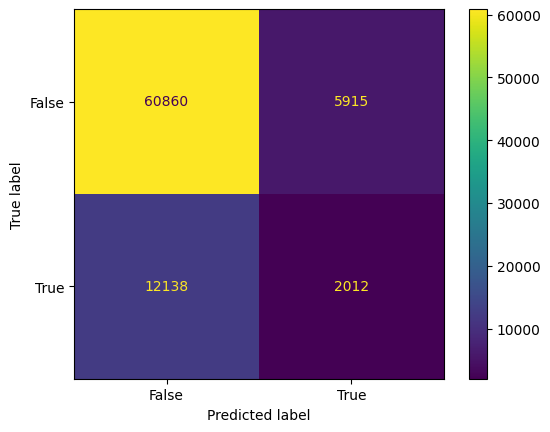

In [113]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_val, y_pred), display_labels = [False, True])
cm_display.plot()

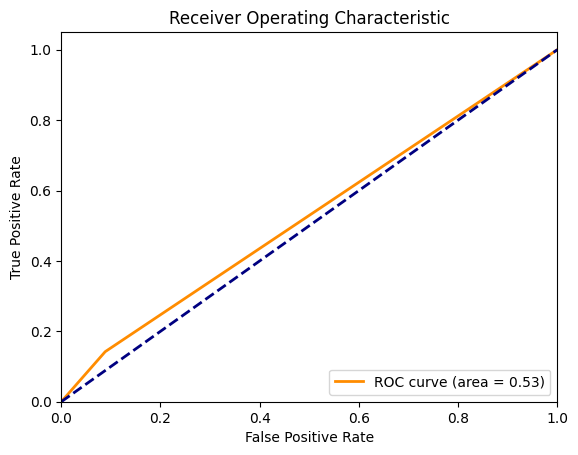

In [114]:
# Calculating ROC curve and AUC
fpr, tpr, threshold = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Second logreg model
lr2 = LogisticRegression(C=0.01,penalty='l2', l1_ratio=0.5,solver='saga', random_state=42, max_iter=500)
lr2.fit(x_train, y_t)
y_pred = lr2.predict(x_val)
print(classification_report(y_val, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.85      0.97      0.91     66775
           1       0.57      0.22      0.32     14150

    accuracy                           0.83     80925
   macro avg       0.71      0.59      0.61     80925
weighted avg       0.80      0.83      0.80     80925



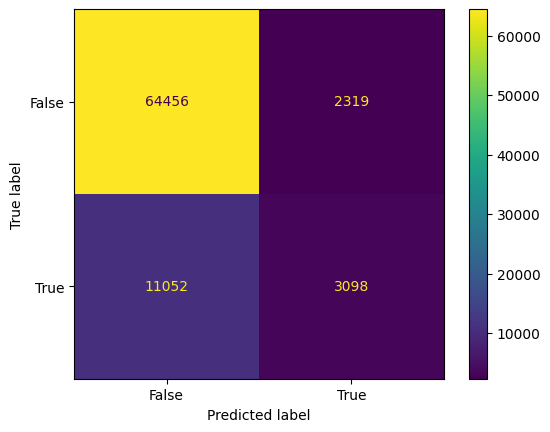

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_val, y_pred), display_labels = [False, True])
cm_display.plot()

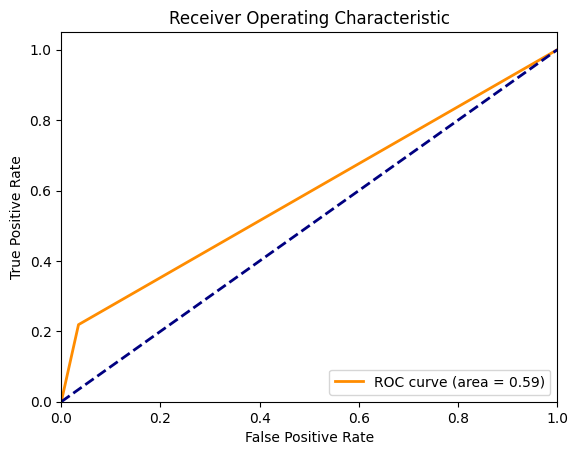

In [ ]:
# Calculating ROC curve and AUC
fpr, tpr, threshold = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Third logreg model
lr3 = LogisticRegression(C=0.01, solver='saga',penalty='elasticnet' ,l1_ratio=0.5,random_state=42, max_iter=500)
lr3.fit(x_train, y_t)
y_pred = lr3.predict(x_val)
print(classification_report(y_val, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.85      0.97      0.91     66775
           1       0.57      0.22      0.32     14150

    accuracy                           0.83     80925
   macro avg       0.71      0.59      0.61     80925
weighted avg       0.80      0.83      0.80     80925



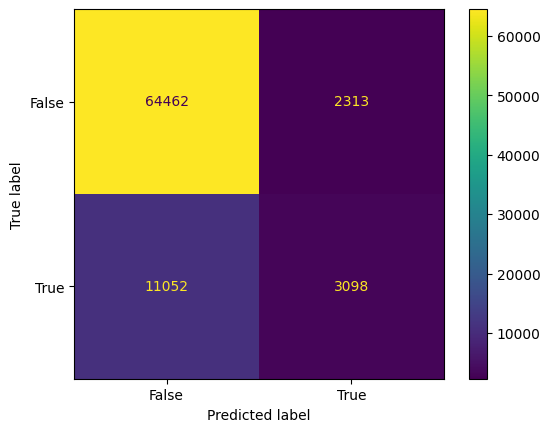

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_val, y_pred), display_labels = [False, True])
cm_display.plot()

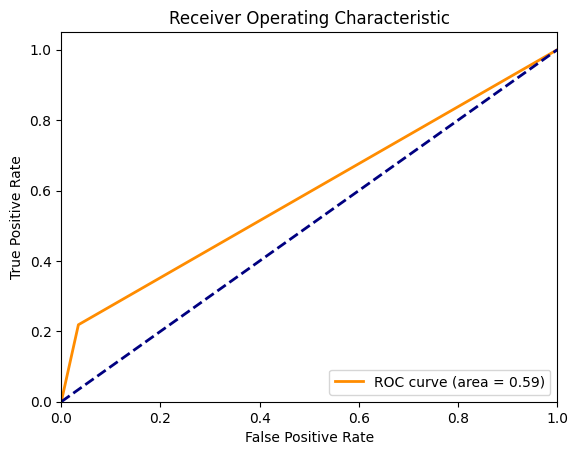

In [ ]:
# Calculating ROC curve and AUC
fpr, tpr, threshold = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [115]:
sgd = SGDClassifier(loss='log_loss', random_state=42, class_weight='balanced',
                        early_stopping=True, n_iter_no_change=10, validation_fraction=0.1)
sgd.fit(x_train, y_t)
y_pred2 = sgd.predict(x_val)
print(classification_report(y_val, y_pred2))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.89      0.74      0.81     66775
           1       0.31      0.56      0.40     14150

    accuracy                           0.71     80925
   macro avg       0.60      0.65      0.60     80925
weighted avg       0.79      0.71      0.74     80925



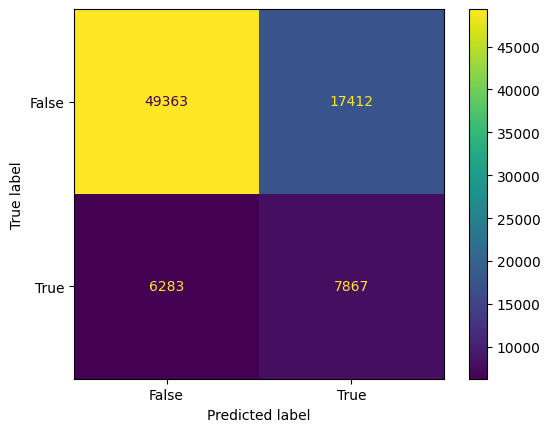

In [116]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_val, y_pred2), display_labels = [False, True])
cm_display.plot()

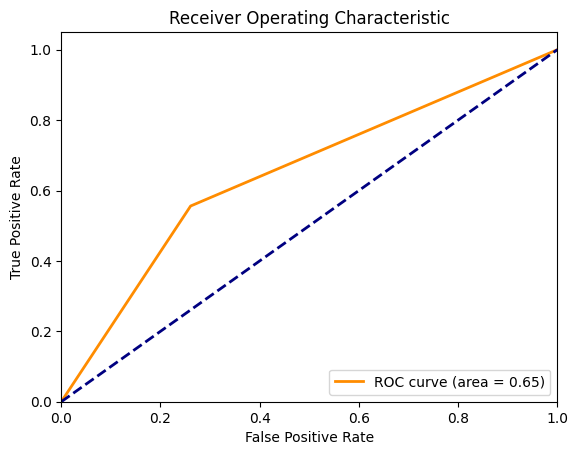

In [117]:
# Calculating ROC curve and AUC
fpr, tpr, threshold = roc_curve(y_val, y_pred2)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Model Tuning Step

1) We first define the searchspace for our logrep model tuning
2) We experiment with different regularizations and Max iterations
3) After running GridSearch, we use different class weights to compare results
4) We pick the best hyerparameters based on our tuning process

In [ ]:
# We use GridSearch for hyperparameter tuning
# we first define the searchspace for hyperparameters
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : [0.001,0.01,0.1],
     'l1_ratio':[0.5],
    'solver' : ['saga'],
    'max_iter' : [500,1000,2000]
    }
]
# run the algorithm
logModel = LogisticRegression()
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1,scoring='roc_auc')
best_clf = clf.fit(x_train,y_t)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
best_clf.best_estimator_

LogisticRegression(C=0.1, l1_ratio=0.5, max_iter=2000, solver='saga')

In [ ]:
# run the model with best parameters in gridsearch
final_model=LogisticRegression(C= 0.1, penalty= 'l2',l1_ratio=0.5, solver= 'saga', max_iter=2000)
final_model.fit(x_train, y_t)
y_pred = final_model.predict(x_val)
print(classification_report(y_pred,y_val))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.97      0.85      0.91     75493
           1       0.22      0.57      0.32      5432

    accuracy                           0.83     80925
   macro avg       0.59      0.71      0.61     80925
weighted avg       0.92      0.83      0.87     80925



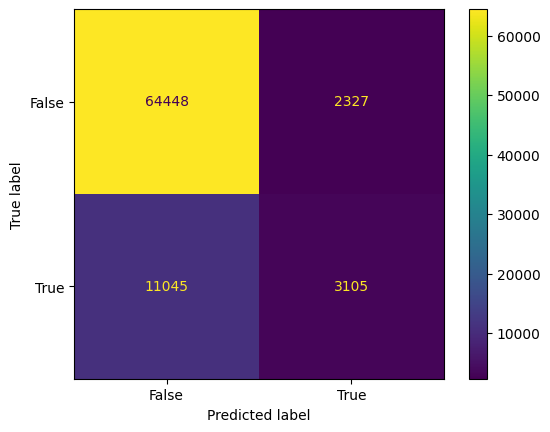

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_val, y_pred), display_labels = [False, True])
cm_display.plot()

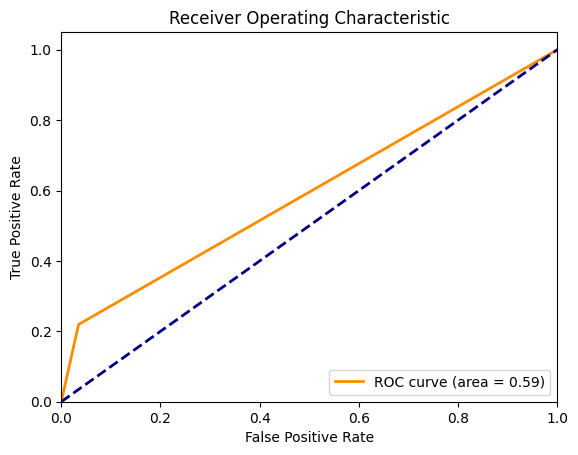

In [ ]:
# Calculating ROC curve and AUC
fpr, tpr, threshold = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [63]:
# now we try different classweights to find the best model for our project
weights = [{0: 1, 1: w} for w in [1, 2,2.05,2.1,2.3,2.35,2.7,2.9,3,4,5]]
auc_s=[]
for weight in weights:
    lr = LogisticRegression(C=0.1,penalty='l2',l1_ratio=0.5, solver='saga', random_state=42, max_iter=2000,class_weight=weight)
    lr.fit(x_train, y_t)
    y_pred = lr.predict(x_val)
    print(f"Class weights: {weight}")
    print(classification_report(y_val, y_pred))
    fpr, tpr, threshold = roc_curve(y_val, y_pred)
    roc_auc = auc(fpr, tpr)
    auc_s.append(roc_auc)
    print(f"AUC: {roc_auc}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Class weights: {0: 1, 1: 1}
              precision    recall  f1-score   support

           0       0.85      0.97      0.91     66775
           1       0.57      0.22      0.32     14150

    accuracy                           0.83     80925
   macro avg       0.71      0.59      0.61     80925
weighted avg       0.80      0.83      0.80     80925

AUC: 0.5922931287893922


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Class weights: {0: 1, 1: 2}
              precision    recall  f1-score   support

           0       0.88      0.89      0.89     66775
           1       0.46      0.43      0.45     14150

    accuracy                           0.81     80925
   macro avg       0.67      0.66      0.67     80925
weighted avg       0.81      0.81      0.81     80925

AUC: 0.6619079023089246


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Class weights: {0: 1, 1: 2.05}
              precision    recall  f1-score   support

           0       0.88      0.89      0.89     66775
           1       0.46      0.44      0.45     14150

    accuracy                           0.81     80925
   macro avg       0.67      0.66      0.67     80925
weighted avg       0.81      0.81      0.81     80925

AUC: 0.6643670069705634


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Class weights: {0: 1, 1: 2.1}
              precision    recall  f1-score   support

           0       0.88      0.89      0.88     66775
           1       0.45      0.45      0.45     14150

    accuracy                           0.81     80925
   macro avg       0.67      0.67      0.67     80925
weighted avg       0.81      0.81      0.81     80925

AUC: 0.6669485231375339


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Class weights: {0: 1, 1: 2.3}
              precision    recall  f1-score   support

           0       0.89      0.87      0.88     66775
           1       0.44      0.48      0.46     14150

    accuracy                           0.80     80925
   macro avg       0.66      0.67      0.67     80925
weighted avg       0.81      0.80      0.81     80925

AUC: 0.6742951184889925


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Class weights: {0: 1, 1: 2.35}
              precision    recall  f1-score   support

           0       0.89      0.87      0.88     66775
           1       0.44      0.48      0.46     14150

    accuracy                           0.80     80925
   macro avg       0.66      0.68      0.67     80925
weighted avg       0.81      0.80      0.80     80925

AUC: 0.6757896421848065


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Class weights: {0: 1, 1: 2.7}
              precision    recall  f1-score   support

           0       0.89      0.84      0.87     66775
           1       0.42      0.53      0.47     14150

    accuracy                           0.79     80925
   macro avg       0.65      0.69      0.67     80925
weighted avg       0.81      0.79      0.80     80925

AUC: 0.685842004093172


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Class weights: {0: 1, 1: 2.9}
              precision    recall  f1-score   support

           0       0.90      0.83      0.86     66775
           1       0.40      0.55      0.47     14150

    accuracy                           0.78     80925
   macro avg       0.65      0.69      0.66     80925
weighted avg       0.81      0.78      0.79     80925

AUC: 0.6901485527713578


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Class weights: {0: 1, 1: 3}
              precision    recall  f1-score   support

           0       0.90      0.82      0.86     66775
           1       0.40      0.56      0.47     14150

    accuracy                           0.78     80925
   macro avg       0.65      0.69      0.66     80925
weighted avg       0.81      0.78      0.79     80925

AUC: 0.6919904536753219


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Class weights: {0: 1, 1: 4}
              precision    recall  f1-score   support

           0       0.91      0.76      0.83     66775
           1       0.36      0.65      0.47     14150

    accuracy                           0.74     80925
   macro avg       0.64      0.70      0.65     80925
weighted avg       0.81      0.74      0.76     80925

AUC: 0.7037184892570775


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Class weights: {0: 1, 1: 5}
              precision    recall  f1-score   support

           0       0.92      0.70      0.80     66775
           1       0.34      0.71      0.46     14150

    accuracy                           0.70     80925
   macro avg       0.63      0.71      0.63     80925
weighted avg       0.82      0.70      0.74     80925

AUC: 0.707219632937466


In [118]:
param_grid_sgd = {
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.001, 0.01, 0.1], # Regularization strength
    'l1_ratio': [0.5], # Only used for elasticnet
    'learning_rate': ['optimal', 'adaptive'], # Adaptive requires eta0
    'eta0': [0.01, 0.1], # Initial learning rate for adaptive
    'max_iter': [1000] # Max iterations
}
grid_search_sgd = GridSearchCV(sgd, param_grid_sgd, cv=3, # Using 3 folds for potentially faster search
                               scoring='roc_auc', n_jobs=-1, verbose=2)

print("Starting GridSearchCV for SGDClassifier...")
grid_search_sgd.fit(x_train, y_t)

Starting GridSearchCV for SGDClassifier...
Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3,
             estimator=SGDClassifier(class_weight='balanced',
                                     early_stopping=True, loss='log_loss',
                                     n_iter_no_change=10, random_state=42),
             n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1], 'eta0': [0.01, 0.1],
                         'l1_ratio': [0.5],
                         'learning_rate': ['optimal', 'adaptive'],
                         'max_iter': [1000],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='roc_auc', verbose=2)

In [119]:
print("\nBest SGD Parameters:", grid_search_sgd.best_params_)
print("Best SGD AUC Score:", grid_search_sgd.best_score_)


Best SGD Parameters: {'alpha': 0.01, 'eta0': 0.1, 'l1_ratio': 0.5, 'learning_rate': 'adaptive', 'max_iter': 1000, 'penalty': 'elasticnet'}
Best SGD AUC Score: 0.8038039785901664


# Best Model

1) We have identified the best model so we simply train the model
2) We find the ideal threshold for our model
3) We compute the metrics and export the model for scoring function

In [120]:
best_sgd_model = grid_search_sgd.best_estimator_

In [121]:
y_pred_sgd = best_sgd_model.predict(x_val)
y_prob_sgd = best_sgd_model.predict_proba(x_val)[:, 1] # Probabilities for class 1

print("\nSGD Classifier Validation Report:")
print(classification_report(y_val, y_pred_sgd))

print("SGD Classifier Validation AUC:", roc_auc_score(y_val, y_prob_sgd))


SGD Classifier Validation Report:
              precision    recall  f1-score   support

           0       0.91      0.74      0.82     66775
           1       0.36      0.67      0.46     14150

    accuracy                           0.73     80925
   macro avg       0.63      0.70      0.64     80925
weighted avg       0.82      0.73      0.76     80925

SGD Classifier Validation AUC: 0.7783710922048491


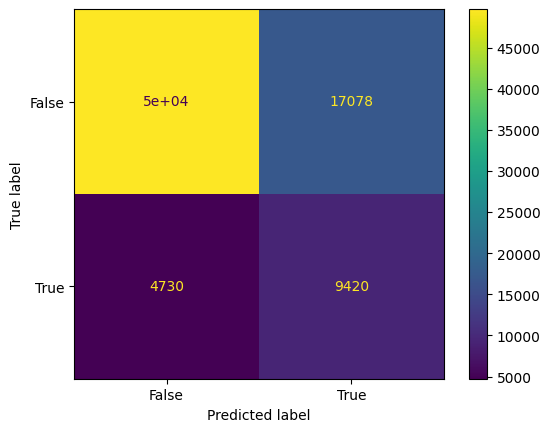

In [122]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_val, y_pred_sgd), display_labels = [False, True])
cm_display.plot()

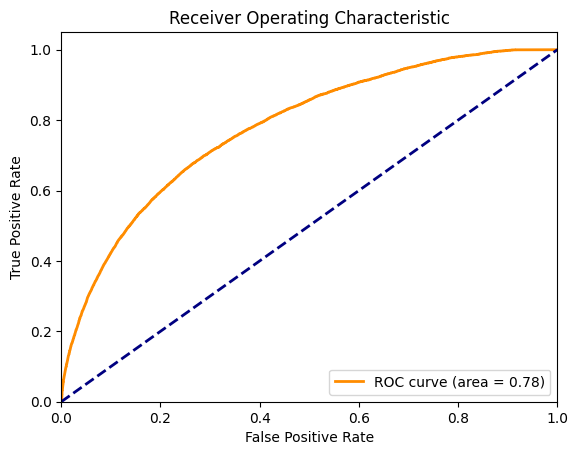

In [123]:
# Calculating ROC curve and AUC
fpr, tpr, threshold =  roc_curve(y_val, y_prob_sgd)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [124]:
with open('sgd_model.pkl', 'wb') as file:
    pickle.dump(best_sgd_model, file)

In [125]:
y_probs = best_sgd_model.predict_proba(x_val)[:, 1]

# Find optimal threshold using F1 macro score
thresholds = np.arange(0, 1, 0.01)
f1_scores = [f1_score(y_val, (y_probs > threshold).astype(int), average='macro') for threshold in thresholds]
optimal_threshold = thresholds[np.argmax(f1_scores)]

print("Optimal Threshold using F1 Macro Score:", optimal_threshold)

Optimal Threshold using F1 Macro Score: 0.66


**Strategy for scoring:
    Load artifacts one by one on this file and experiment on the validation file by loading it here first
    Perform the trasformations and then the testing on the file and get the output the same way its done on the function
    if it works , export the code from here to the scoring function.**
    

**So the scoring function has been done.
But there are some issues to address:
    1) Data might be severely imbalanced since F1 score is low
    2) Threshold is 0 which is bad again due to imbalance
    3) Might have to drop original features in favor of engineered features or,
    4) Feature Selection algorithms**

# SUMMARY OF THE PROJECT

**The project primarily focued on the SBA loans dataset. After data cleaning and EDA we used feature engineering to create better features for our model. The project included the use of logistic regression in both sklearn and h20. The logistic regression models used were experimented with multiple hyperparamreters using gridsearch and the ideal set of parameters was identified. The feature engineering step helped decrease multicollinearity by using PCA and further using feature selection/ViF helped improve performance. From the observations made, the best model had no regularization and performed with an f1 macro score of 0.65 and accuracy of 76%. On further analysis using Scoring function and the kaggle submission board, a score of 76.45% was obtained. On the H20 side our best model performs with an AUC score of 0.78 and AIC of 551259.8254321709. we experimented with multiple regularizations and regularization strenghts. The sklearn model was used for our scoring function since it gave us the best results. The ideal threshold after using f1 macro was 0.54.
Moving forward a set of recommendations would primarily focus on experimenting with other models that deal better with data imbalance. Another approach could be used data resampling such as oversampling and undersampling the data to try improving model performance. Lastly more engineered features which increase explainability could ultimately result in a better model.**

In [ ]:
import sklearn as sk


In [ ]:
print(sk.__version__)

1.6.1
